In [18]:
import pandas as pd
import ewtpy
import pywt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers

      name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  humidity   precip  precipprob  precipcover preciptype  snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  uvindex  severerisk              sunrise               sunset  moonphase              conditions                                                                 description               icon                                                     stations
0    Hanoi  2013-02-12     18.1     16.0  16.7          18.1          16.0       16.7  14.8      88.5    1.483         100         8.33       rain   NaN        NaN       NaN       16.6    354.2            1018.8        92.0         5.6           143.4         12.4        5         NaN  2013-02-12T06:28:39  2013-02-12T17:53:13       0.06          Rain, Overcast     Cloudy skies throughout the day with rain in the morning and afternoon.               rain         48820099999,488

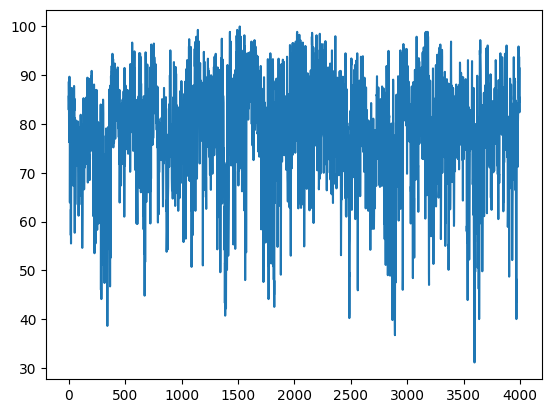

In [128]:
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df = pd.concat([df5, df4, df3, df2, df1])
print(df.to_string())
data = df.to_numpy()
temp = df['temp'].to_numpy()
temp_max = df['tempmax'].to_numpy()
temp_min = df['tempmin'].to_numpy()

dew = df['dew'].to_numpy()
humidity = df['humidity'].to_numpy()


precipitation = df['precip'].to_numpy()
precipcover = df['precipcover'].to_numpy()
precipprob = df['precipprob'].to_numpy()

windspeed = df['windspeed'].to_numpy()
winddir = df['winddir'].to_numpy()

cloudcover = df['cloudcover'].to_numpy()
solar_radiation = df['solarradiation'].to_numpy()
solarenergy = df['solarenergy'].to_numpy()
uvindex = df['uvindex'].to_numpy()
moonphase = df['moonphase'].to_numpy()

training_set = np.array([humidity, temp, precipitation, precipprob, windspeed, solar_radiation])
plt.plot(humidity)

NUM = 0

In [116]:

training_set_tp = training_set.transpose()

In [117]:
def window_data(data, input_size, output_size):
    dataset = tf.data.Dataset.from_tensor_slices(data)
    dataset = dataset.window(input_size + output_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(input_size + output_size))
    X = dataset.map(lambda window: (window[:-output_size]))
    y = dataset.map(lambda window: (window[-output_size:]))
    return X,y

In [144]:
X_tf,y_tf = window_data(training_set_tp, 200, 1)
X = np.array([x.numpy() for x in X_tf]).transpose(0,2,1)
y = np.array([y.numpy() for y in y_tf]).transpose(0,2,1)
print(X.shape)
print(y.shape)

(3796, 6, 200)
(3796, 6, 1)


In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True
)


In [146]:
model = Sequential(
    [
        tf.keras.Input(shape=(6,200,)),
        tf.keras.layers.Dense(units = 25, activation = "relu", kernel_regularizer=tf.keras.regularizers.L1(0.005)),
        tf.keras.layers.Dense(units = 15, activation = "relu", kernel_regularizer=tf.keras.regularizers.L1(0.005)),
        tf.keras.layers.Dense(units = 10, activation = "relu", kernel_regularizer=tf.keras.regularizers.L1(0.005)),
        tf.keras.layers.Dense(units = 10, activation = "linear")
        ### END CODE HERE ### 
    ], name = "mlpnn_model" 
) 
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
)
print(X_train.shape)
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist_mlpnn = model.fit(
    X_train,y_train,
    epochs=1000,  
    # callbacks = [callback] 
) 

(2657, 6, 200)
Epoch 1/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8906.4502
Epoch 2/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1665.0649
Epoch 3/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1019.7733
Epoch 4/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1001.8625
Epoch 5/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 933.2764
Epoch 6/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 911.4164
Epoch 7/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 889.7961
Epoch 8/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 861.5089
Epoch 9/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 918.6926
Epoch 10/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 827.3735
Epoch 11/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 794.3160
Epoch 12/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 787.4363
Epoch 13/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 773.4403
Epoch 14/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 766.4979
Epoch 15/1

In [ ]:
# model = Sequential(
#     [
#         tf.keras.Input(shape=(5,)),
#         tf.keras.layers.LSTM(units = 32),
#     ], name = "lstm_model" 
# ) 
# model.compile(
#     loss=tf.keras.losses.MeanSquaredError(),
#     optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
# )
# if (NUM != 0):
#     X_train = X_train[:-NUM]
# else:
#     X_train = X_train[:]
# print(X_train.shape)
# hist_mlpnn = model.fit(
#     X_train,y_train,
#     epochs=500,  
# ) 

In [ ]:
# model = Sequential(
#     [
#         tf.keras.Input(shape=(5,)),
#         tf.keras.layers.Dense(units = 2000, activation = "relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),
#     bias_initializer=initializers.Zeros()),
#         tf.keras.layers.Dense(units = 1, activation = "linear")
#         ### END CODE HERE ### 
#     ], name = "elm_model" 
# ) 
# model.compile(
#     loss=tf.keras.losses.MeanSquaredError(),
#     optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
# )
# # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# if (NUM != 0):
#     X_train = X_train[:-NUM]
# else:
#     X_train = X_train[:]
# hist_elm = model.fit(
#     X_train,y_train,
#     epochs=1000,   
#     # callbacks = [callback]
# ) 


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(2657, 6, 10)
(2657, 6, 1)
TRAIN 1
R: [[1.         0.69710691]
 [0.69710691 1.        ]]
RMSE: 7.820524965548841
MAE: 5.992953500399519
TRAIN 1
R: [[1.         0.67441445]
 [0.67441445 1.        ]]
RMSE: 8.252327430427766
MAE: 6.369499183098824


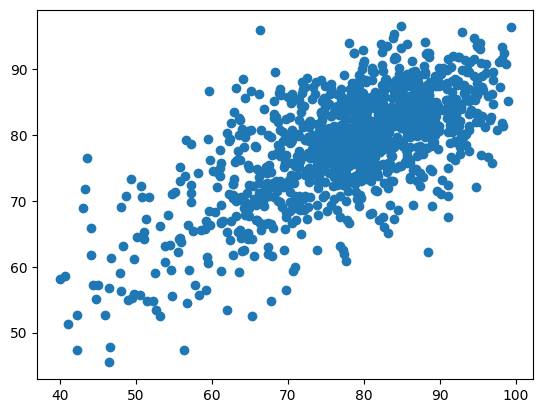

In [150]:
yt_predict = model.predict(X_train)
y_predict = model.predict(X_test)
print(yt_predict.shape)
print(y_train.shape)
feature = 0
for i in range(1):
    print(f"TRAIN {i+1}")
    print(f"R: {np.corrcoef(yt_predict[:,feature,i],y_train[:,feature,i])}")
    print(f"RMSE: {mean_squared_error(y_train[:,feature,i],yt_predict[:,feature,i])**(1/2)}")
    print(f"MAE: {mean_absolute_error(y_train[:,feature,i],yt_predict[:,feature,i])}")
for i in range(1):
    print(f"TRAIN {i+1}")
    print(f"R: {np.corrcoef(y_predict[:,feature,i],y_test[:,feature,i])}")
    print(f"RMSE: {mean_squared_error(y_test[:,feature,i],y_predict[:,feature,i])**(1/2)}")
    print(f"MAE: {mean_absolute_error(y_test[:,feature,i],y_predict[:,feature,i])}")
plt.scatter(y_test[:,feature,0],y_predict[:,feature,0])

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
predict: [-0.1187101  -0.05608642 -0.03335229 -0.01650059 -0.01437271 -0.00966841
 -0.00014657  0.0005542  -0.00118482 -0.00380835], test: [ 0.21254806 -0.67990113 -1.45149783 -0.7542719   0.26832613 -0.03845328
 -0.41030711 -0.60553037  0.16606633 -0.41030711]
predict: [ 0.4308902  -0.01884583 -0.21600747 -0.29804483 -0.31229544 -0.32954523
 -0.3888539  -0.41745767 -0.38747755 -0.37517813], test: [ 0.77962515  0.38917863  0.11028825 -1.68390648 -1.67461013 -0.66130844
 -0.27086192 -1.55375764 -2.22309453 -2.63213374]
predict: [-0.60577375 -0.4328506  -0.36089885 -0.3185372  -0.30299893 -0.28489363
 -0.2592406  -0.25435567 -0.25620595 -0.2609784 ], test: [-0.36382538 -0.5311596  -0.01056424 -0.1035277  -0.54975229  0.38917863
  0.38917863  0.8911813   0.38917863 -0.13141674]
predict: [-0.8284076  -0.764002   -0.73689693 -0.71159875 -0.6904414  -0.66901004
 -0.65672773 -0.6600028  -0.6489589  -0.64959276], te

TypeError: expected 1D vector for x

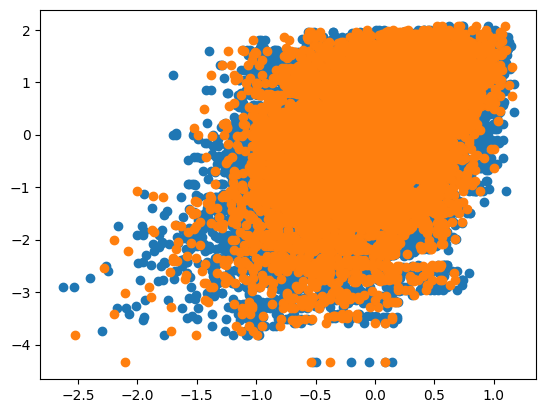

In [97]:
yt_predict = model.predict(X_train)
y_predict = model.predict(X_test)
plt.scatter(yt_predict[:,0],y_train[:,0])
plt.scatter(y_predict[:,0],y_test[:,0])
for i in range(len(y_predict) - NUM):
    print(f"predict: {y_predict[i,0]}, test: {y_test[i, 0]}")

print("TRAIN DETAIL")
print(f"R: {np.corrcoef(yt_predict[:,0],y_train[:,0])}")
print(f"RMSE: {mean_squared_error(y_train[:,0],yt_predict[:,0])**(1/2)}")
print(f"MAE: {mean_absolute_error(y_train[:,0],yt_predict[:,0])}")
# print(f"SCORE: {accuracy_score(y_train[:,0],yt_predict[:,0])}")
mt, bt = np.polyfit(yt_predict[:,0],y_train[:,0], 1)
plt.plot(yt_predict[:,0], mt*yt_predict[:,0]+bt, color = "yellow")
#add linear regression line to scatterplot 
print("TEST DETAIL")
print(f"R: {np.corrcoef(y_predict[:,0],y_test[:,0])}")
print(f"RMSE: {mean_squared_error(y_test[:,0],y_predict[:,0])**(1/2)}")
print(f"MAE: {mean_absolute_error(y_test[:,0],y_predict[:,0])}")
# print(f"SCORE: {accuracy_score(y_test[:,0],y_predict[:,0])}")
m, b = np.polyfit(y_predict[:,0],y_test[:,0], 1)
plt.plot(y_predict[:,0], m*y_predict[:,0]+b, color = "red")


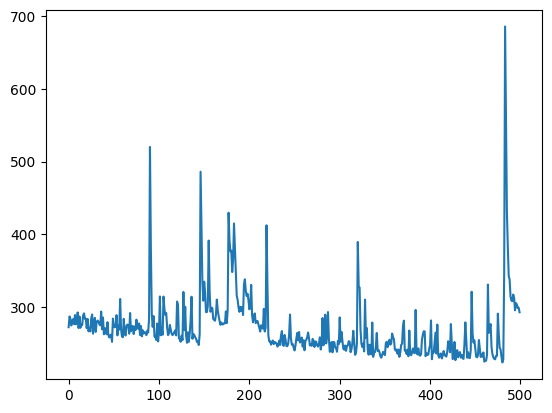

In [154]:
# plt.plot(history.history['loss'][200:500])
# print(history.history["loss"][400:500])
plt.plot(hist_mlpnn.history['loss'][500:1000])

ValueError: x and y can be no greater than 2D, but have shapes (1139,) and (1139, 6, 10)

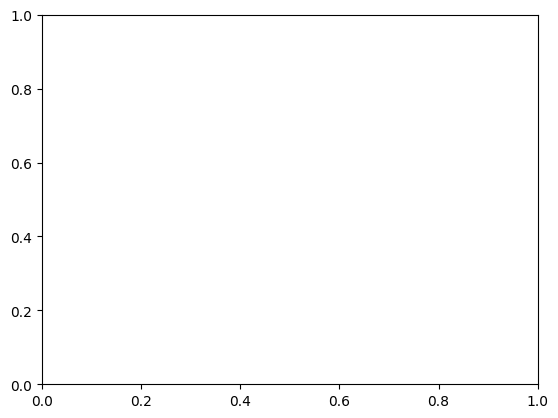

In [151]:
plt.plot(y_predict, label = "predict")
plt.plot(y_test)
plt.plot(abs(y_predict - y_test))
plt.legend(['predict', 'test', 'loss'])